<H1> Modelo Preditivo Final </H1>
Objetivo: Execução do Modelo Preditivo Final;

<p>-> ler os dados do conjunto de testes (heart-test.csv);
<p>-> selecionar os atributos para o modelo;
<p>-> realizar as transformações que se fizeram necessárias nos dados; 
<p>-> gerar o arquivo CSV resultante (heart-results.csv); e
<p>-> executar a persistência do modelo em arquivo binário/serializado (ex: Pickle ou RDS).

In [1]:
# Basico
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
import joblib
import pickle
import seaborn as sns
from sklearn.dummy import DummyClassifier
from timeit import default_timer as timer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
warnings.filterwarnings('ignore')

<H2>Carga dos Dados</H2>

In [2]:
#CARGA DOS DADOS
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# data = pd.read_csv("heart-train.csv") 
data = pd.read_csv(
    "heart-test.csv",              
    na_values=['?']     
)

data['Hospital'] = data.Hospital.str.replace('C', '1')
data['Hospital'] = data.Hospital.str.replace('H', '2')
data['Hospital'] = data.Hospital.str.replace('S', '3')
data['Hospital'] = data.Hospital.str.replace('V', '4')
data['Hospital'] = data.Hospital.astype(int)

data['Sexo'] = data.Sexo.str.replace('F', '1')
data['Sexo'] = data.Sexo.str.replace('M', '2')
data['Sexo'] = data.Sexo.astype(int)

dataframeFinal = pd.DataFrame(data['Paciente'], columns=['Paciente']) 
data = data.drop(['Paciente'], axis = 1)

#dummies 
data = pd.get_dummies(data, columns = ['Sexo'])
#escalar
standardScaler = StandardScaler() #MinMaxScaler()
columns_to_scale = ['TDP', 'PAR','CS', 'ASJ', 'ECG', 'FCM', 'AIE', 'DST', 'IST', 'NVP']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])
#para usar depois no REST
scaler_filename = "scaler.save"
joblib.dump(standardScaler, scaler_filename) 

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="most_frequent")
data.dtypes
data = data.fillna(data.agg(lambda x: pd.Series.mode(x)[0], axis=0))
print(data)

     Hospital  Idade       TDP       PAR        CS       ASJ       ECG  \
0           1     50 -0.215175 -0.557463  0.198206 -0.410824 -0.746187   
1           1     62 -1.231464 -0.175729  0.095193  2.434132  1.757413   
2           1     52 -0.215175  0.301438  0.235665 -0.410824 -0.746187   
3           1     53 -0.215175 -0.175729  0.170111 -0.410824  1.757413   
4           2     38  0.801114 -1.034631 -1.852686 -0.410824 -0.746187   
..        ...    ...       ...       ...       ...       ...       ...   
302         1     56 -1.231464 -0.557463  0.394867 -0.410824 -0.746187   
303         1     57 -1.231464 -0.080296  0.357408 -0.410824  1.757413   
304         2     58 -0.215175  1.351207  0.123287  2.434132  0.505613   
305         2     41  0.801114 -1.034631  0.853742 -0.410824 -0.746187   
306         2     47  0.801114  0.396872  0.732000  2.434132 -0.746187   

          FCM       AIE       DST       IST       NVP  Talassemia  Sexo_1  \
0    0.733970 -0.802538  0.655533 

In [3]:
data

,Hospital,Idade,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia,Sexo_1,Sexo_2
0,1,50,-0.215175,-0.557463,0.198206,-0.410824,-0.746187,0.733970,-0.802538,0.655533,0.307266,-0.727393,3.0,1,0
1,1,62,-1.231464,-0.175729,0.095193,2.434132,1.757413,0.012127,-0.802538,-0.831800,-1.251011,-0.727393,3.0,0,1
2,1,52,-0.215175,0.301438,0.235665,-0.410824,-0.746187,1.175097,-0.802538,-0.831800,-1.251011,-0.727393,3.0,0,1
3,1,53,-0.215175,-0.175729,0.170111,-0.410824,1.757413,-0.990433,-0.802538,-0.831800,-1.251011,-0.727393,3.0,1,0
4,2,38,0.801114,-1.034631,-1.852686,-0.410824,-0.746187,0.413151,1.246046,0.097783,0.307266,-0.727393,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1,56,-1.231464,-0.557463,0.394867,-0.410824,-0.746187,1.175097,-0.802538,-0.831800,1.865543,-0.727393,3.0,0,1
303,1,57,-1.231464,-0.080296,0.357408,-0.410824,1.757413,1.375609,-0.802538,-0.831800,0.307266,0.509175,3.0,1,0
304,2,58,-0.215175,1.351207,0.123287,2.434132,0.505613,-1.912788,-0.802538,-0.831800,0.307266,-0.727393,3.0,0,1
305,2,41,0.801114,-1.034631,0.853742,-0.410824,-0.746187,1.215199,-0.802538,-0.831800,0.307266,-0.727393,6.0,0,1


In [4]:
filename = 'model.pkl'
model = pickle.load(open(filename, 'rb'))

In [5]:
Ypredict = model.predict(data)
Ypredict

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [6]:
dataframeFinal

,Paciente
0,25
1,249
2,166
3,87
4,529
...,...
302,289
303,301
304,552
305,501


In [7]:
dataframeFinal['Diagnóstico'] = pd.DataFrame(Ypredict, columns=['Diagnóstico']) 
dataframeFinal

,Paciente,Diagnóstico
0,25,0
1,249,0
2,166,0
3,87,0
4,529,1
...,...,...
302,289,0
303,301,0
304,552,0
305,501,1


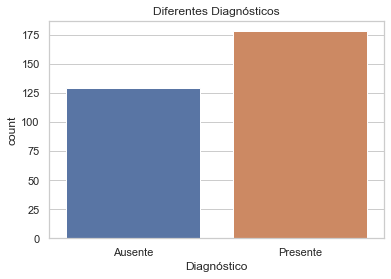

In [8]:
sns.set(style="whitegrid")
bp = sns.countplot(x=dataframeFinal["Diagnóstico"])
plt.title("Diferentes Diagnósticos")
bp.set_xticklabels(["Ausente","Presente"])
plt.show()

In [9]:
filenamePKL = 'model_results.pkl'
pickle.dump(model, open(filenamePKL, 'wb'))

In [10]:
filenameCSV = 'heart-results.csv'
dataframeFinal['Diagnóstico'] = dataframeFinal.Diagnóstico.replace(0,'A')
dataframeFinal['Diagnóstico'] = dataframeFinal.Diagnóstico.replace(1,'P')
dataframeFinal.to_csv(filenameCSV,index=None)

In [11]:
dataframeFinal

,Paciente,Diagnóstico
0,25,A
1,249,A
2,166,A
3,87,A
4,529,P
...,...,...
302,289,A
303,301,A
304,552,A
305,501,P
